# 자이로센서 라즈베리파이 (자전거 데이터) 데이터 살펴보기
- 변화량 파악
- 이상치 추정 (사분위값 사용) // 사분위 범위값 파악 후 1.5배 이상을 outlier로 설정 // quantile 메서드 사용
- 그래프 그리기 // how? ==> 박스플롯을 우선 그려볼까?
- Z 변화량은 주요변수가 아니기 때문에 쓰지 않는다.

# 참고사이트
- https://sosomemo.tistory.com/34
- http://www.databaser.net/moniwiki/wiki.php/%EC%9D%B4%EC%83%81%EC%B9%98%EC%A0%9C%EA%B1%B0%EB%B0%A9%EB%B2%95

In [1]:
# 우선 4분위로 나눌 값을 먼저 구합시다. ==> X 변화량

import pandas as pd

# 데이터 불러오기
gyro_df = pd.read_csv("./data/gyro/자전거.csv", sep=";")

display(gyro_df)

# 정규화용 평균 및 표준편차 구하기
print("X 평균 :",  gyro_df['accel_xout'].mean())
print("X 표준편차 :",  gyro_df['accel_xout'].std())
print("Y 평균 :",  gyro_df['accel_yout'].mean())
print("Y 표준편차 :",  gyro_df['accel_yout'].std())
print("Z 평균 :",  gyro_df['accel_zout'].mean())
print("Z 표준편차 :",  gyro_df['accel_zout'].std())

# 정규화하기
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

scale_columns = ['gyro_xout', 'gyro_yout', 'gyro_zout', 'accel_xout', 'accel_yout', 'accel_zout']
gyro_data = standard_scaling(gyro_df, scale_columns)


print("X 정규화 평균 :",  gyro_df['accel_xout'].mean())
print("X 정규화 표준편차 :",  gyro_df['accel_xout'].std())
print("Y 정규화 평균 :",  gyro_df['accel_yout'].mean())
print("Y 정규화 표준편차 :",  gyro_df['accel_yout'].std())
print("Z 정규화 평균 :",  gyro_df['accel_zout'].mean())
print("Z 정규화 표준편차 :",  gyro_df['accel_zout'].std())

# 변화량 컬럼 넣어주기
variance_list = []
for i in range(len(gyro_data)) :
    try :
        variance = gyro_data.iloc[i+1,4] - gyro_data.iloc[i,4]
        variance_list.append(abs(variance))
    except :
        variance_list.append(0)
        
gyro_data['X변화량'] = variance_list


variance_list2 = []
for i in range (len(gyro_data)):
    try :
        variance2 = gyro_data.iloc[i+1,5] - gyro_data.iloc[i,5]
        variance_list2.append(abs(variance2))
    except :
        variance_list2.append(0)
        
gyro_data['Y변화량'] = variance_list2


variance_list3 = []
for i in range (len(gyro_data)):
    try :
        variance3 = gyro_data.iloc[i+1,6] - gyro_data.iloc[i,6]
        variance_list3.append(abs(variance3))
    except :
        variance_list3.append(0)
        
gyro_data['Z변화량'] = variance_list3


# 확인
display(gyro_data)

,1,gyro_xout,gyro_yout,gyro_zout,accel_xout,accel_yout,accel_zout
0,1287,-15,299,115,-1428,-980,15920
1,1288,-215,354,2,-1308,-1024,15760
2,1289,968,344,243,-1376,-948,16024
3,1290,1733,328,239,-1104,-668,16132
4,1291,2262,784,-2164,-1428,-1260,15900
...,...,...,...,...,...,...,...
6718,8005,2422,4752,532,1016,372,15720
6719,8006,-1109,-3125,-135,100,228,15908
6720,8007,558,-10191,-1312,1780,-144,16048
6721,8008,2092,-5671,-146,5568,628,14480


X 평균 : -866.465565967574
X 표준편차 : 1613.4888133990205
Y 평균 : -5726.632753235162
Y 표준편차 : 2903.044587371531
Z 평균 : 14694.955972036294
Z 표준편차 : 2487.6326450220795
X 정규화 평균 : 8.455067508672916e-18
X 정규화 표준편차 : 0.9999999999999999
Y 정규화 평균 : -1.3528108013876665e-16
Y 정규화 표준편차 : 1.0
Z 정규화 평균 : -2.8747229529487916e-16
Z 정규화 표준편차 : 1.0


,1,gyro_xout,gyro_yout,gyro_zout,accel_xout,accel_yout,accel_zout,X변화량,Y변화량,Z변화량
0,1287,-0.012083,-0.077004,0.022206,-0.348025,1.635053,0.492454,0.074373,0.015157,0.064318
1,1288,-0.098304,-0.044756,-0.014539,-0.273652,1.619897,0.428136,0.042145,0.026179,0.106125
2,1289,0.411692,-0.050619,0.063828,-0.315797,1.646076,0.534261,0.168579,0.096450,0.043415
3,1290,0.741487,-0.060001,0.062527,-0.147218,1.742527,0.577675,0.200807,0.203924,0.093261
4,1291,0.969541,0.207369,-0.718860,-0.348025,1.538603,0.484414,0.037186,0.717867,0.035375
...,...,...,...,...,...,...,...,...,...,...
6718,8005,1.038517,2.533956,0.157802,1.166705,2.100771,0.412056,0.567714,0.049603,0.075574
6719,8006,-0.483711,-2.084624,-0.059087,0.598991,2.051168,0.487630,1.041222,0.128141,0.056278
6720,8007,0.234940,-6.227685,-0.441814,1.640213,1.923027,0.543908,2.347708,0.265928,0.630318
6721,8008,0.896253,-3.577439,-0.062664,3.987921,2.188955,-0.086410,1.452753,0.086805,0.192955


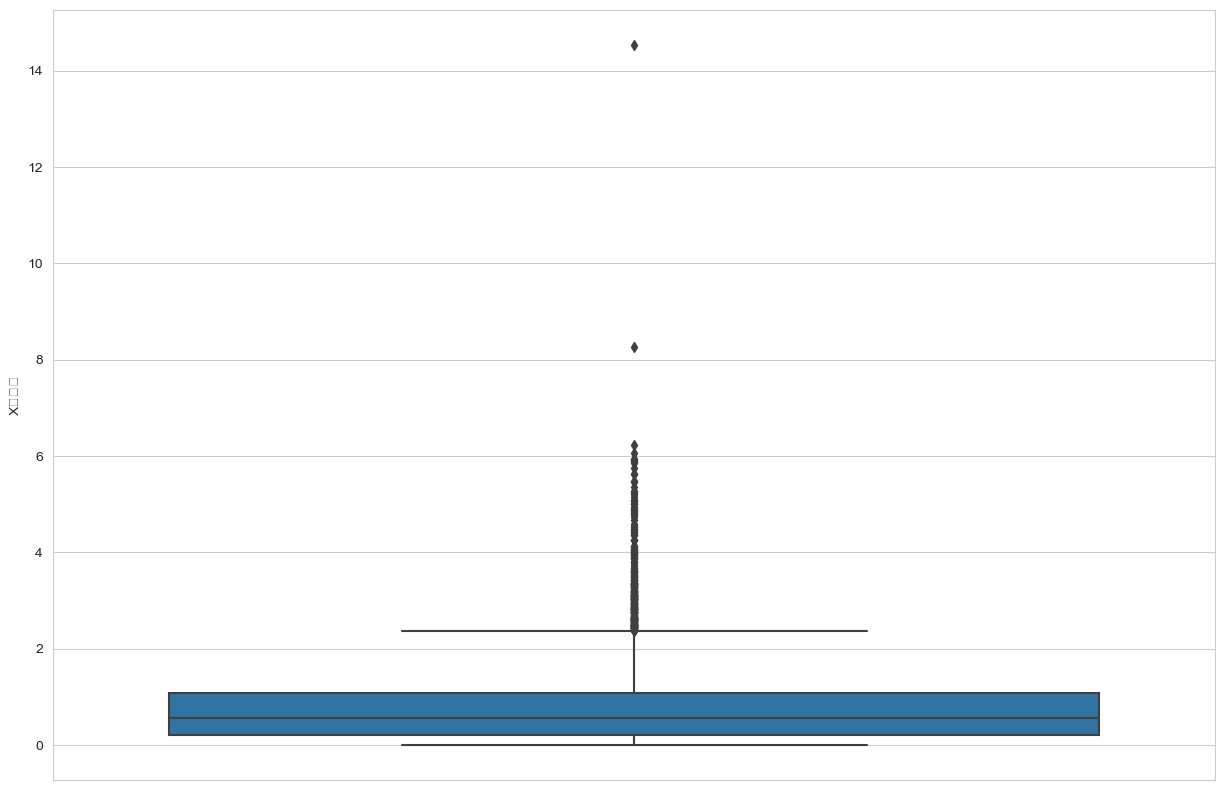

In [13]:
# 박스플롯으로 파악

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 한글 및 마이너스 부호 깨짐현상 방지
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False # 마이너스부호 출력설정

sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,10))

sns.boxplot(y='X변화량', data=gyro_data)
plt.show()


# 이상치 가 시작되는 부분을 찾아서 alert 함수 변수로 넣자

# quantile 을 이용해 4분위를 파악하자

In [3]:
# X 값을 구해봅시다.

X_Q1 = gyro_data['X변화량'].quantile(.25)
X_Q2 = gyro_data['X변화량'].quantile(.5)
X_Q3 = gyro_data['X변화량'].quantile(.75)
X_Q4 = gyro_data['X변화량'].quantile(1)
X_IQR = X_Q3 - X_Q1 # IQR은 4분위 범위를 말한다.

# 제3사분위수 + 1.5*사분위범위
X_outlier = X_Q3 + 1.5*X_IQR

print("X변화량 1분위 값 :",X_Q1)
print("X변화량 2분위 값 :",X_Q2)
print("X변화량 3분위 값 :",X_Q3)
print("X변화량 4분위 값 :",X_Q4)
print("X변화량 이상치 범위 시작 :",X_outlier)

# 이상치는 어떤 게 제일 좋을까

X변화량 1분위 값 : 0.21568169367526852
X변화량 2분위 값 : 0.5553183837156338
X변화량 3분위 값 : 1.0734502685217389
X변화량 4분위 값 : 14.534962873771255
X변화량 이상치 범위 시작 : 2.3601031307914444


In [4]:
# Y 값을 구해봅시다.

Y_Q1 = gyro_data['Y변화량'].quantile(.25)
Y_Q2 = gyro_data['Y변화량'].quantile(.5)
Y_Q3 = gyro_data['Y변화량'].quantile(.75)
Y_Q4 = gyro_data['Y변화량'].quantile(1)
Y_IQR = Y_Q3 - Y_Q1 # IQR은 4분위 범위를 말한다.

# 제3사분위수 + 1.5*사분위범위
Y_outlier = Y_Q3 + 1.5*Y_IQR

print("Y변화량 1분위 값 :",Y_Q1)
print("Y변화량 2분위 값 :",Y_Q2)
print("Y변화량 3분위 값 :",Y_Q3)
print("Y변화량 4분위 값 :",Y_Q4)
print("Y변화량 이상치 범위 시작 :",Y_outlier)

# 이상치는 어떤 게 제일 좋을까

Y변화량 1분위 값 : 0.12538560433533408
Y변화량 2분위 값 : 0.3141529427302876
Y변화량 3분위 값 : 0.6393287957318133
Y변화량 4분위 값 : 11.622281017236736
Y변화량 이상치 범위 시작 : 1.4102435828265323


In [5]:
count = 0
for variance in gyro_data['X변화량']:
    if variance > X_outlier*2 :
#         print("안전운전하세욧!!!!")
        count += 1
    else : 
        pass
#         print("keep going baby")
        
print(count) 
# X_outlier로 사용하면 314이고 / 주호가 실제 이상치를 만든 값은 36개이다. (사실 이상치라기보다 변화값 )
# X_outlier*3 으로 하면 2개
# X_outlier*2 으로 하면 35개
# X_Q3로 하면 1679개
# X_Q3*3 으로 하면 123개

35


In [6]:
count = 0
for variance in gyro_data['Y변화량']:
    if variance > Y_outlier :
#         print("안전운전하세욧!!!!")
        count += 1
    else : 
        pass
#         print("keep going baby")
        
print(count) 
# Y_outlier로 사용하면 430개이고 / 주호가 실제 이상치를 만든 값은 36개이다. (사실 이상치라기보다 변화값 )
# Y_outlier*3 으로 하면 23개
# Y_outlier*2 으로 하면 98개
# Y_Q3로 하면 1678개
# Y_Q3*3 으로 하면 234개

430


# 군집분석을 시도해봅시다.

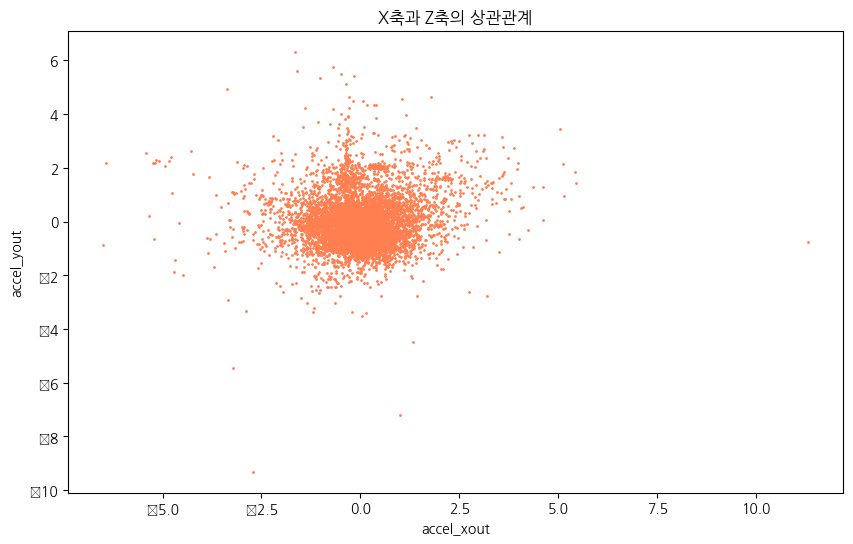

In [14]:
# 군집분석을 어떻게 할 것인가? -> 산점도부터 그려보자!!

# 먼저 accel_xout과 accel_zout을 산점도를 그려보자
plt.style.use('default')

gyro_data.plot(kind='scatter', x='accel_xout', y='accel_yout', c='coral', s=1, figsize=(10,6))
# plt.xlim(0, 1)
# plt.ylim(0, 0.5)
plt.title('X축과 Z축의 상관관계')
plt.show()


In [8]:
# 라벨링해서 데이터를 만들어보자 ==> 어차피 비지도학습으로는 절대 못해 / good, bad로 나눠서 하자

gyro_data['label']="good"

for k in range(len(gyro_data)):
    if gyro_data.iloc[k,4] > (X_outlier) :
        gyro_data.iloc[k,10] = "bad"
    if gyro_data.iloc[k,4] < -(X_outlier) :
        gyro_data.iloc[k,10] = "bad"
    if gyro_data.iloc[k,5] > (Y_outlier) :
        gyro_data.iloc[k,10] = "bad"
    if gyro_data.iloc[k,5] < -(Y_outlier) :
        gyro_data.iloc[k,10] = "bad"
    
display(gyro_data)

gyro_data.groupby("label").get_group("bad")



,1,gyro_xout,gyro_yout,gyro_zout,accel_xout,accel_yout,accel_zout,X변화량,Y변화량,Z변화량,label
0,1287,-0.012083,-0.077004,0.022206,-0.348025,1.635053,0.492454,0.074373,0.015157,0.064318,bad
1,1288,-0.098304,-0.044756,-0.014539,-0.273652,1.619897,0.428136,0.042145,0.026179,0.106125,bad
2,1289,0.411692,-0.050619,0.063828,-0.315797,1.646076,0.534261,0.168579,0.096450,0.043415,bad
3,1290,0.741487,-0.060001,0.062527,-0.147218,1.742527,0.577675,0.200807,0.203924,0.093261,bad
4,1291,0.969541,0.207369,-0.718860,-0.348025,1.538603,0.484414,0.037186,0.717867,0.035375,bad
...,...,...,...,...,...,...,...,...,...,...,...
6718,8005,1.038517,2.533956,0.157802,1.166705,2.100771,0.412056,0.567714,0.049603,0.075574,bad
6719,8006,-0.483711,-2.084624,-0.059087,0.598991,2.051168,0.487630,1.041222,0.128141,0.056278,bad
6720,8007,0.234940,-6.227685,-0.441814,1.640213,1.923027,0.543908,2.347708,0.265928,0.630318,bad
6721,8008,0.896253,-3.577439,-0.062664,3.987921,2.188955,-0.086410,1.452753,0.086805,0.192955,bad


,1,gyro_xout,gyro_yout,gyro_zout,accel_xout,accel_yout,accel_zout,X변화량,Y변화량,Z변화량,label
0,1287,-0.012083,-0.077004,0.022206,-0.348025,1.635053,0.492454,0.074373,0.015157,0.064318,bad
1,1288,-0.098304,-0.044756,-0.014539,-0.273652,1.619897,0.428136,0.042145,0.026179,0.106125,bad
2,1289,0.411692,-0.050619,0.063828,-0.315797,1.646076,0.534261,0.168579,0.096450,0.043415,bad
3,1290,0.741487,-0.060001,0.062527,-0.147218,1.742527,0.577675,0.200807,0.203924,0.093261,bad
4,1291,0.969541,0.207369,-0.718860,-0.348025,1.538603,0.484414,0.037186,0.717867,0.035375,bad
...,...,...,...,...,...,...,...,...,...,...,...
6718,8005,1.038517,2.533956,0.157802,1.166705,2.100771,0.412056,0.567714,0.049603,0.075574,bad
6719,8006,-0.483711,-2.084624,-0.059087,0.598991,2.051168,0.487630,1.041222,0.128141,0.056278,bad
6720,8007,0.234940,-6.227685,-0.441814,1.640213,1.923027,0.543908,2.347708,0.265928,0.630318,bad
6721,8008,0.896253,-3.577439,-0.062664,3.987921,2.188955,-0.086410,1.452753,0.086805,0.192955,bad


<Figure size 1000x600 with 0 Axes>

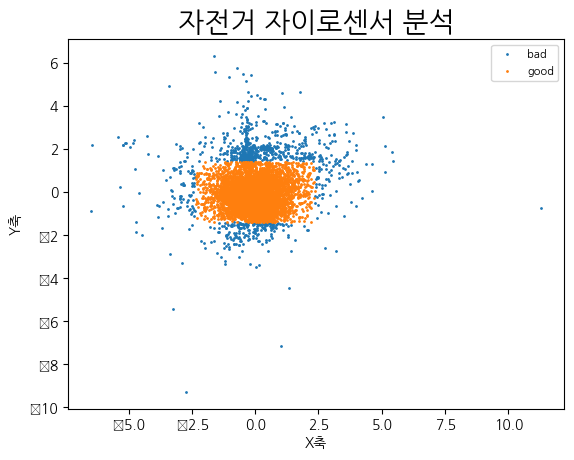

In [9]:
# 참고사이트 : https://rfriend.tistory.com/414

# Scatter plot with a different color by groups

groups = gyro_data.groupby('label')
plt.figure(figsize=(10,6))
plt.style.use('default')


fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.accel_xout, 
            group.accel_yout, 
            marker='o', 
            markersize=1,
            linestyle='',
            label=name)

ax.legend(fontsize=8, loc='upper right') # legend position
plt.title('자전거 자이로센서 분석', fontsize=20)
plt.xlabel('X축', fontsize=10)
plt.ylabel('Y축', fontsize=10)
plt.show()

<Figure size 1000x600 with 0 Axes>

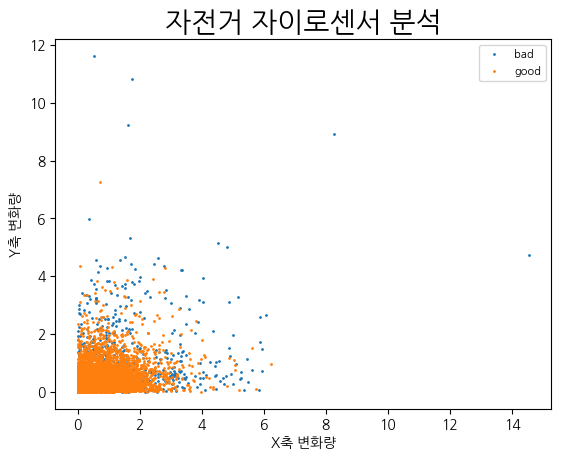

In [10]:
# 참고사이트 : https://rfriend.tistory.com/414

# Scatter plot with a different color by groups

groups = gyro_data.groupby('label')
plt.figure(figsize=(10,6))
plt.style.use('default')


fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.X변화량, 
            group.Y변화량, 
            marker='o', 
            markersize=1,
            linestyle='',
            label=name)

ax.legend(fontsize=8, loc='upper right') # legend position
plt.title('자전거 자이로센서 분석', fontsize=20)
plt.xlabel('X축 변화량', fontsize=10)
plt.ylabel('Y축 변화량', fontsize=10)
plt.show()
